Accuracy: 0.97
Confusion Matrix:
 [[ 33   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0]
 [  0  40   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0  32   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    0   0   0   1   0   1   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   7   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0  61   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 111   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0 213   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0]
 [  0   1   0   0   0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


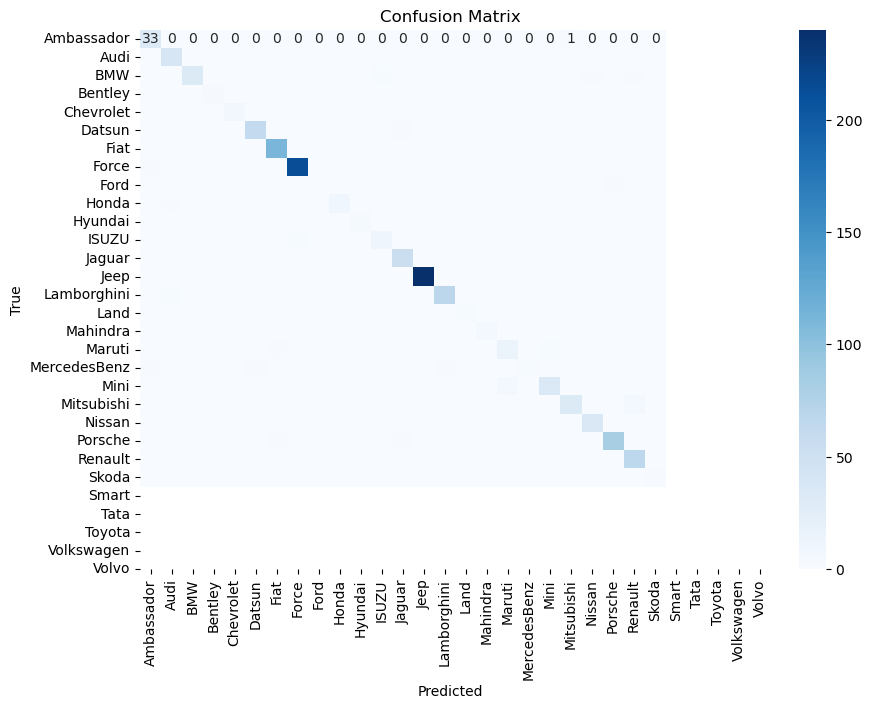

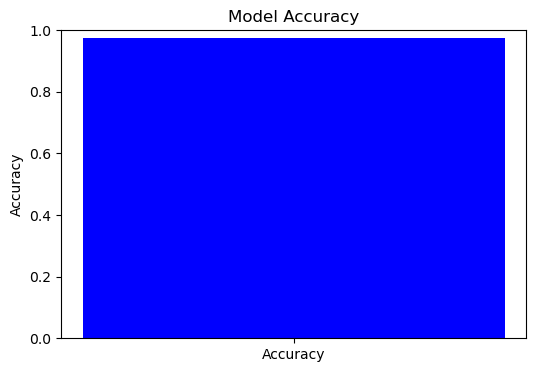

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
data = pd.read_csv('new_car_data.csv')

# Columns to drop
columns_to_drop = [
    # Add columns you want to drop from the new data
]

# Drop specified columns
data = data.drop(columns_to_drop, axis=1)
data = data.dropna()

# List of features
features = [
    "Engine CC",
    "Power",
    "Seats",
    "Mileage Km/L",
    # Add more features as needed
]

# Define X (features) and y (target)
X = data[features]
y = data["Manufacturer"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualize accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()


In [2]:
# Initialize lists to store accuracy scores and confusion matrices
accuracies = []
conf_matrices = []

# Run the model 20 times
for i in range(20):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=i)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
    conf_matrices.append(conf_matrix)

    # Print progress
    print(f'Run {i+1}/20: Accuracy = {accuracy:.2f}')

# Calculate the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot the average confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(avg_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

# Plot the accuracy over 20 runs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over 20 Runs')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Print final average accuracy
avg_accuracy = np.mean(accuracies)
print(f'Average Accuracy over 20 runs: {avg_accuracy:.2f}')

Run 1/20: Accuracy = 0.97
Run 2/20: Accuracy = 0.97
Run 3/20: Accuracy = 0.97
Run 4/20: Accuracy = 0.98
Run 5/20: Accuracy = 0.97
Run 6/20: Accuracy = 0.97
Run 7/20: Accuracy = 0.97
Run 8/20: Accuracy = 0.97
Run 9/20: Accuracy = 0.97
Run 10/20: Accuracy = 0.97
Run 11/20: Accuracy = 0.98
Run 12/20: Accuracy = 0.97
Run 13/20: Accuracy = 0.98
Run 14/20: Accuracy = 0.98
Run 15/20: Accuracy = 0.98
Run 16/20: Accuracy = 0.98
Run 17/20: Accuracy = 0.97
Run 18/20: Accuracy = 0.98
Run 19/20: Accuracy = 0.97
Run 20/20: Accuracy = 0.98


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20,) + inhomogeneous part.

In [3]:
# Initialize lists to store accuracy scores and confusion matrices
accuracies = []
conf_matrices = []

# Run the model 20 times
for i in range(20):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=i)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
    conf_matrices.append(conf_matrix)

    # Print progress
    print(f'Run {i+1}/20: Accuracy = {accuracy:.2f}')

# Calculate the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot the average confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(avg_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

# Plot the accuracy over 20 runs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over 20 Runs')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Print final average accuracy
avg_accuracy = np.mean(accuracies)
print(f'Average Accuracy over 20 runs: {avg_accuracy:.2f}')


Run 1/20: Accuracy = 0.97
Run 2/20: Accuracy = 0.97
Run 3/20: Accuracy = 0.97
Run 4/20: Accuracy = 0.98
Run 5/20: Accuracy = 0.97
Run 6/20: Accuracy = 0.97
Run 7/20: Accuracy = 0.97
Run 8/20: Accuracy = 0.97
Run 9/20: Accuracy = 0.97
Run 10/20: Accuracy = 0.97
Run 11/20: Accuracy = 0.98
Run 12/20: Accuracy = 0.97
Run 13/20: Accuracy = 0.98
Run 14/20: Accuracy = 0.98
Run 15/20: Accuracy = 0.98
Run 16/20: Accuracy = 0.98
Run 17/20: Accuracy = 0.97
Run 18/20: Accuracy = 0.98
Run 19/20: Accuracy = 0.97
Run 20/20: Accuracy = 0.98


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20,) + inhomogeneous part.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
data = pd.read_csv('new_car_data.csv')

# Columns to drop
columns_to_drop = [
    # Add columns you want to drop from the new data
]

# Drop specified columns
data = data.drop(columns_to_drop, axis=1)
data = data.dropna()

# List of features
features = [
    "Engine CC",
    "Power",
    "Seats",
    "Mileage Km/L",
    # Add more features as needed
]

# Define X (features) and y (target)
X = data[features]
y = data["Manufacturer"]

# Initialize lists to store accuracy scores and confusion matrices
accuracies = []
conf_matrices = []

# Run the model 20 times
for i in range(20):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=i)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
    conf_matrices.append(conf_matrix)

    # Print progress
    print(f'Run {i+1}/20: Accuracy = {accuracy:.2f}')

# Calculate the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot the average confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(avg_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

# Plot the accuracy over 20 runs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over 20 Runs')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Print final average accuracy
avg_accuracy = np.mean(accuracies)
print(f'Average Accuracy over 20 runs: {avg_accuracy:.2f}')


Run 1/20: Accuracy = 0.97
Run 2/20: Accuracy = 0.97
Run 3/20: Accuracy = 0.97
Run 4/20: Accuracy = 0.98
Run 5/20: Accuracy = 0.97
Run 6/20: Accuracy = 0.97
Run 7/20: Accuracy = 0.97
Run 8/20: Accuracy = 0.97
Run 9/20: Accuracy = 0.97
Run 10/20: Accuracy = 0.97
Run 11/20: Accuracy = 0.98
Run 12/20: Accuracy = 0.97
Run 13/20: Accuracy = 0.98
Run 14/20: Accuracy = 0.98
Run 15/20: Accuracy = 0.98
Run 16/20: Accuracy = 0.98
Run 17/20: Accuracy = 0.97
Run 18/20: Accuracy = 0.98
Run 19/20: Accuracy = 0.97
Run 20/20: Accuracy = 0.98


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20,) + inhomogeneous part.

Run 1/20: Accuracy = 0.97
Run 2/20: Accuracy = 0.97
Run 3/20: Accuracy = 0.97
Run 4/20: Accuracy = 0.98
Run 5/20: Accuracy = 0.97
Run 6/20: Accuracy = 0.97
Run 7/20: Accuracy = 0.97
Run 8/20: Accuracy = 0.97
Run 9/20: Accuracy = 0.97
Run 10/20: Accuracy = 0.97
Run 11/20: Accuracy = 0.98
Run 12/20: Accuracy = 0.97
Run 13/20: Accuracy = 0.98
Run 14/20: Accuracy = 0.98
Run 15/20: Accuracy = 0.98
Run 16/20: Accuracy = 0.98
Run 17/20: Accuracy = 0.97
Run 18/20: Accuracy = 0.98
Run 19/20: Accuracy = 0.97
Run 20/20: Accuracy = 0.98


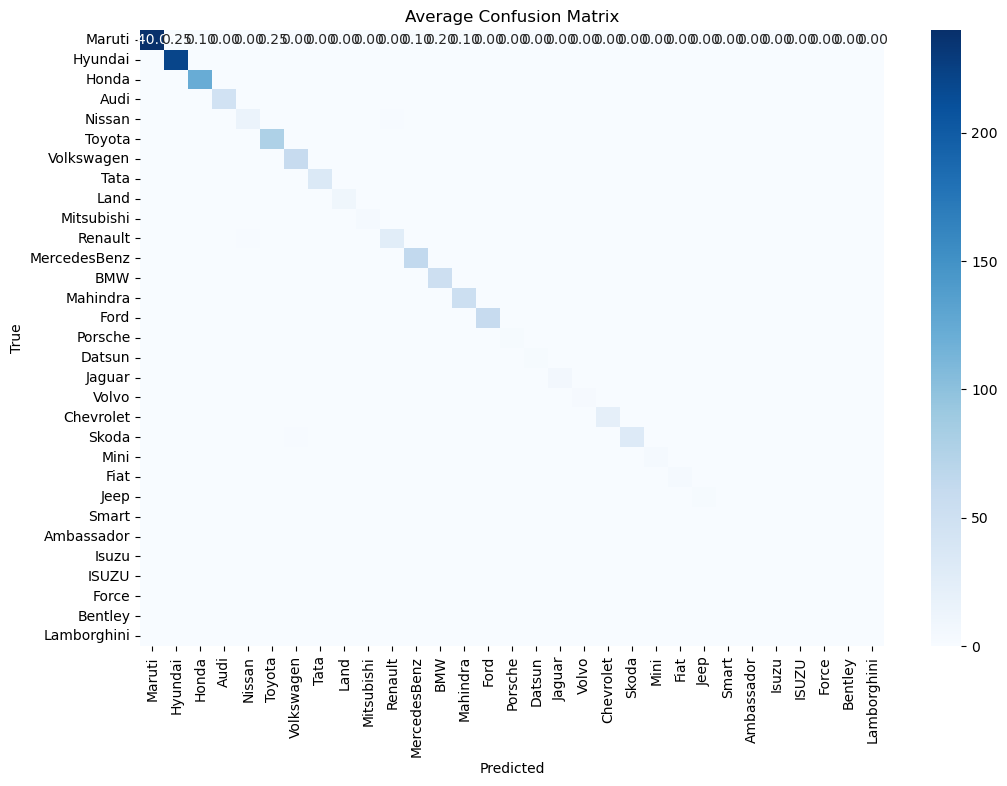

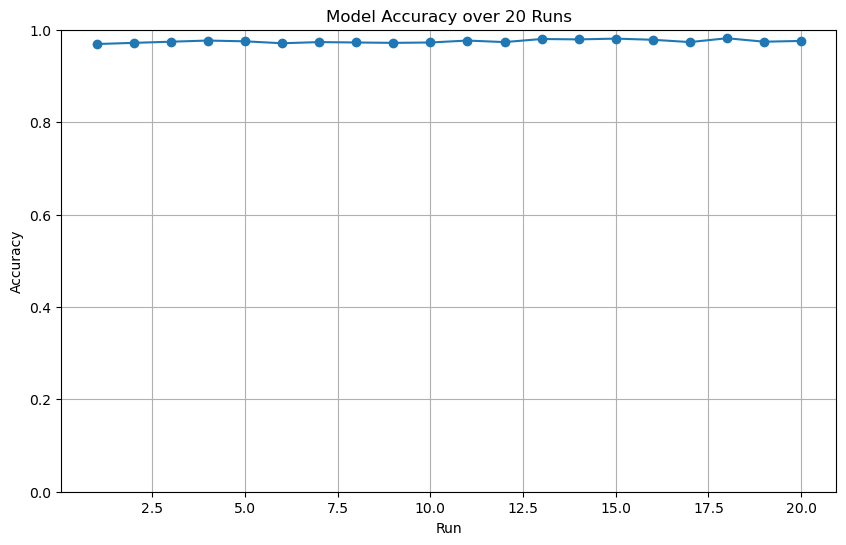

Average Accuracy over 20 runs: 0.97


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
data = pd.read_csv('new_car_data.csv')

# Columns to drop
columns_to_drop = [
    # Add columns you want to drop from the new data
]

# Drop specified columns
data = data.drop(columns_to_drop, axis=1)
data = data.dropna()

# List of features
features = [
    "Engine CC",
    "Power",
    "Seats",
    "Mileage Km/L",
    # Add more features as needed
]

# Define X (features) and y (target)
X = data[features]
y = data["Manufacturer"]

# Get all unique class labels
class_labels = y.unique()

# Initialize lists to store accuracy scores and confusion matrices
accuracies = []
conf_matrices = []

# Run the model 20 times
for i in range(20):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=i)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Generate confusion matrix with consistent labels
    conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)
    conf_matrices.append(conf_matrix)

    # Print progress
    print(f'Run {i+1}/20: Accuracy = {accuracy:.2f}')

# Calculate the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot the average confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(avg_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

# Plot the accuracy over 20 runs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over 20 Runs')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Print final average accuracy
avg_accuracy = np.mean(accuracies)
print(f'Average Accuracy over 20 runs: {avg_accuracy:.2f}')


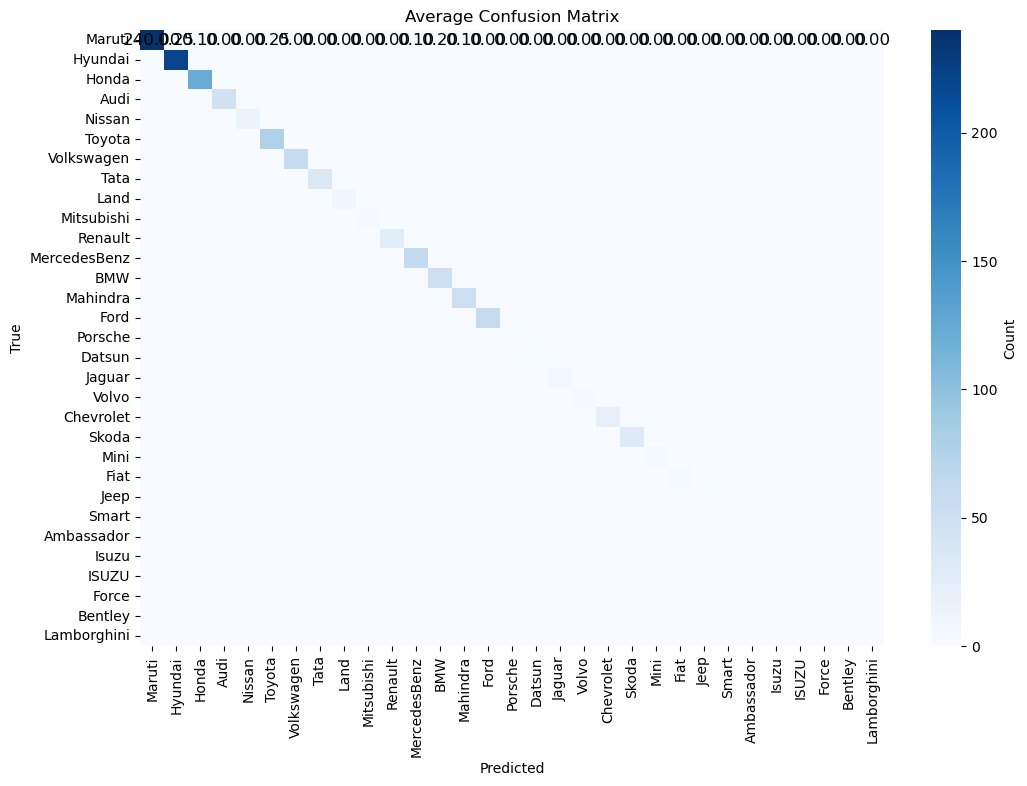

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming avg_conf_matrix and class_labels are already defined

# Plot the average confusion matrix
plt.figure(figsize=(12, 8))
ax = sns.heatmap(avg_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels,
                 annot_kws={"size": 12, "color": "black"}, cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Average Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming avg_conf_matrix and class_labels are already defined

# Plot the average confusion matrix
plt.figure(figsize=(12, 8))
ax = sns.heatmap(avg_conf_matrix, annot=True, fmt='g', cmap='Blues', 
                 xticklabels=class_labels, yticklabels=class_labels, 
                 annot_kws={"size": 12, "color": "black"})
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Average Confusion Matrix')
plt.show()
